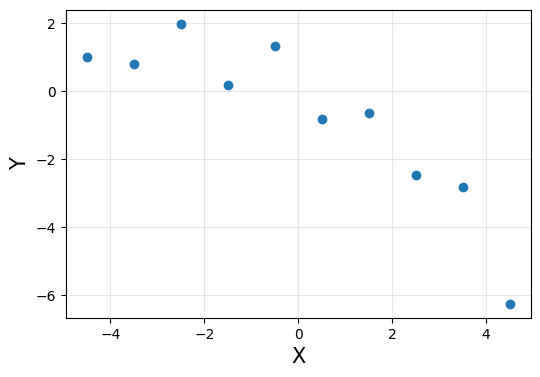

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 10 data points
n = 10
x = np.linspace(-4.5, 4.5, 10)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512])

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'o', label = 'Data')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

In [2]:
p = np.polyfit(x, y, deg = 1)

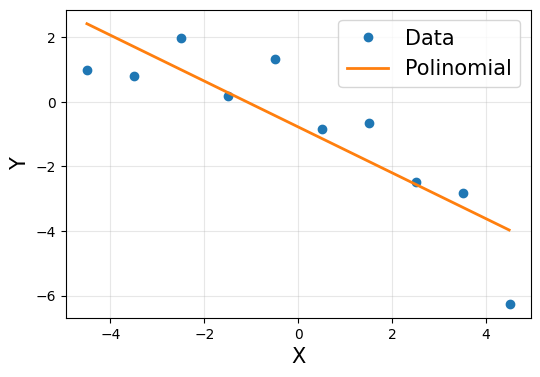

In [3]:
xp = np.arange(-4.5, 4.5, 0.01)
yp = np.polyval(p, xp)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, linewidth = 2, label = 'Polinomial')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

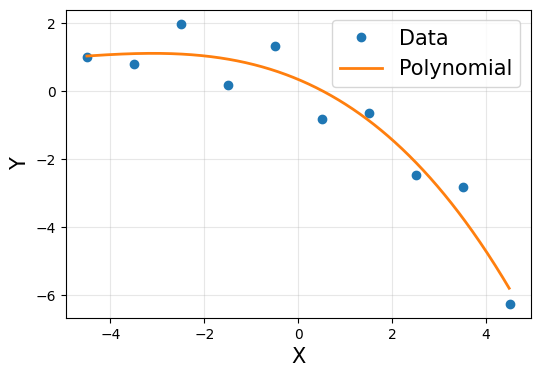

In [5]:
p = np.polyfit(x, y, deg = 3)

xp = np.arange(-4.5, 4.5, 0.01)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, np.polyval(p, xp), linewidth = 2, label = 'Polynomial')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

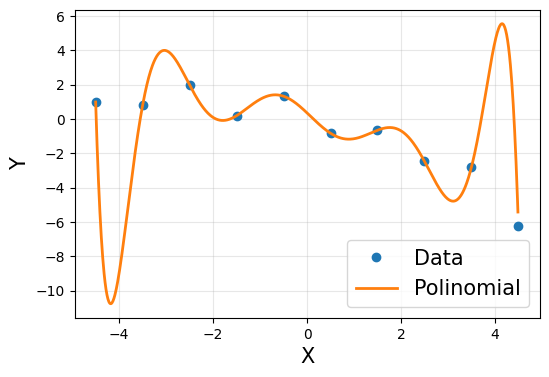

In [4]:
p = np.polyfit(x, y, deg = 9)

xp = np.arange(-4.5, 4.5, 0.01)
yp = np.polyval(p, xp)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, linewidth = 2, label = 'Polinomial')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()

---

In [7]:
from sklearn.preprocessing import MaxAbsScaler

# 10 data points
m = 10
train_x = np.linspace(-4.5, 4.5, 10).reshape(-1,1)
train_y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1,1)

d = 9
train_X = np.hstack([train_x**(i+1) for i in range(d)])
train_X = MaxAbsScaler().fit_transform(train_X)
train_X = np.asmatrix(train_X)

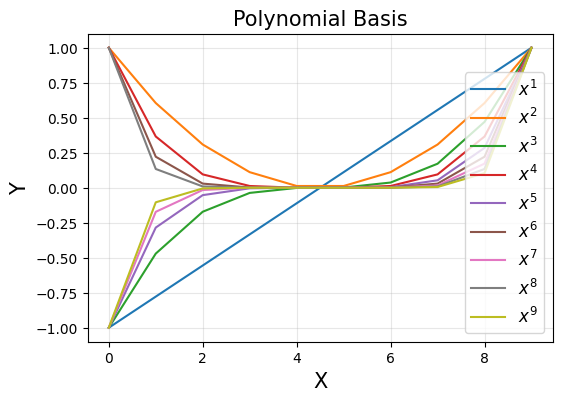

In [8]:
plt.figure(figsize = (6, 4))

for i in range(d):
    plt.plot(train_X[:,i], label = '$x^{}$'.format(i+1))

plt.title('Polynomial Basis', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [9]:
import tensorflow as tf

LR = 0.1
n_iter = 10000

w = tf.Variable(tf.random.normal([d, 1]))
b = tf.Variable(tf.random.normal([1, 1]))
train_input = tf.constant(train_X, dtype = tf.float32)
train_output = tf.constant(train_y, dtype = tf.float32)

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_pred = tf.add(tf.matmul(train_input,w), b)
        loss = tf.square(y_pred - train_output)
        loss = tf.reduce_mean(loss)
        w_grad, b_grad = tape.gradient(loss, [w, b])

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)
    b.assign_sub(LR * b_grad)

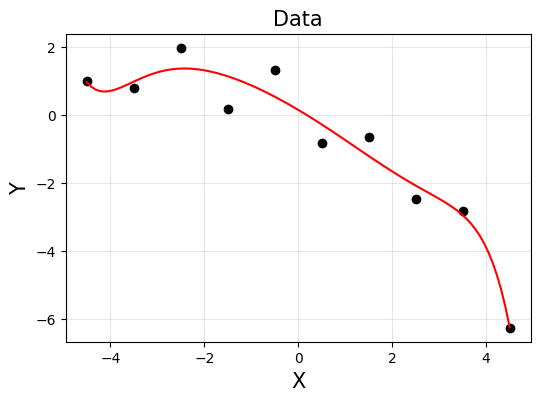

In [10]:
w_val = w.numpy()
b_val = b.numpy()

xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
Xp = np.hstack([xp**(i+1) for i in range(d)])
Xp = MaxAbsScaler().fit_transform(Xp)
Xp = np.asmatrix(Xp)

yp = Xp*w_val + b_val

plt.figure(figsize = (6, 4))
plt.plot(train_x, train_y,'ko')
plt.plot(xp, yp, 'r')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
#plt.axis('equal')
plt.grid(alpha = 0.3)
#plt.xlim([0, 5])
plt.show()

### Regularization

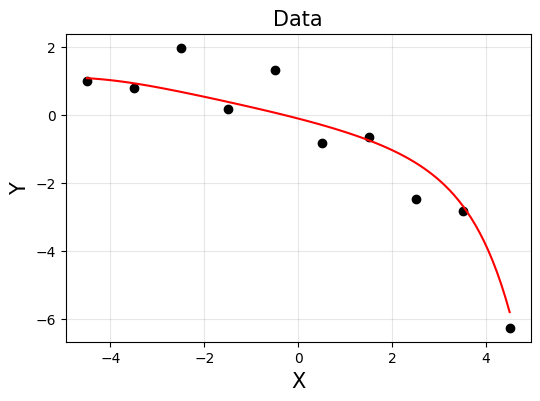

In [11]:
import tensorflow as tf

LR = 0.1
lamb = 0.1
n_iter = 10000

w = tf.Variable(tf.random.normal([d, 1]))
b = tf.Variable(tf.random.normal([1, 1]))
train_input = tf.constant(train_X, dtype = tf.float32)
train_output = tf.constant(train_y, dtype = tf.float32)

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_pred = tf.add(tf.matmul(train_input,w), b)
        reg = tf.reduce_mean(tf.square(w)) #here
        loss = tf.square(y_pred - train_output)
        loss = tf.reduce_mean(loss)
        w_grad, b_grad = tape.gradient(loss + reg, [w, b])

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)
    b.assign_sub(LR * b_grad)

w_val = w.numpy()
b_val = b.numpy()

xp = np.linspace(-4.5, 4.5, 100).reshape(-1,1)
Xp = np.hstack([xp**(i+1) for i in range(d)])
Xp = MaxAbsScaler().fit_transform(Xp)
Xp = np.asmatrix(Xp)

yp = Xp*w_val + b_val

plt.figure(figsize = (6, 4))
plt.plot(train_x, train_y,'ko')
plt.plot(xp, yp, 'r')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
#plt.axis('equal')
plt.grid(alpha = 0.3)
#plt.xlim([0, 5])
plt.show()